In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

fname = '../data/130315_1_minute_intervals.csv'
df_gt = pd.read_csv(fname, delimiter=',', comment='#')
df_gt

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,1,het,0,True,9.519,9.519,0.6,NaN
1,1,het,0,True,9.536,9.536,1.9,NaN
2,1,het,0,True,9.553,9.553,1.9,NaN
3,1,het,0,True,9.569,9.569,13.4,NaN
4,1,het,0,True,9.586,9.586,15.4,NaN
5,1,het,0,True,9.603,9.603,12.7,NaN
6,1,het,0,True,9.619,9.619,11.4,NaN
7,1,het,0,True,9.636,9.636,11.6,NaN
8,1,het,0,True,9.652,9.652,8.4,NaN
9,1,het,0,True,9.669,9.669,3.2,8.050000e+01


In [130]:
fishIds = df_gt.iloc[:, 0].tolist()
fishTypes = df_gt.iloc[:,1].tolist()
fishActivity = df_gt.iloc[:,6].tolist()

mut = []
wt = []
het = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0

for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wt.append(totalZeroesWt/totalPeriodsWt)
            totalZeroesWt = 0
            totalPeriodsWt = 0
        elif (fishTypes[i-1] == "mut"):
            mut.append(totalZeroesMut/totalPeriodsMut)
            totalZeroesMut = 0
            totalPeriodsMut = 0
        else:
            het.append(totalZeroes/totalPeriods)
            totalZeroes = 0
            totalPeriods = 0
            
    if (fishActivity[i] >= 0.001):
        continue
    if (fishTypes[i] == "het" and fishActivity[i] < 0.001):
        totalZeroes += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriods += 1
    elif (fishTypes[i] == "wt" and fishActivity[i] < 0.001):
        totalZeroesWt += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >=  0.001):
            totalPeriodsWt += 1
    else:
        totalZeroesMut += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriodsMut += 1
totalRestLengthMut = 0.0
totalRestLengthWt = 0.0
totalRestLengthHet = 0.0
for i in range(len(mut)):
    totalRestLengthMut += mut[i]
for i in range(len(het)):
    totalRestLengthHet += het[i]
for i in range(len(wt)):
    totalRestLengthWt += wt[i]

mut = np.asarray(mut)
het = np.asarray(het)
wt = np.asarray(wt)

In [131]:
def student_t(mu, x):
    """
    Returns the Student-t distribution for values of mu with data x.
    We could use scipy.stats for this, but we'll do it ourselves.
    """
    # Number of data
    n = len(x)
    
    # Mean of data
    x_mean = x.mean()
    
    # Compute r^2
    r2 = ((x - x_mean)**2).sum() / n
    
    # Compute the mu-dependent part
    t = (1.0 + (mu - x_mean)**2 / r2)**(-n / 2.0)
    
    # Normalize and return
    return -scipy.special.beta(-0.5, n / 2.0) / 2.0 / np.pi / np.sqrt(r2) * t

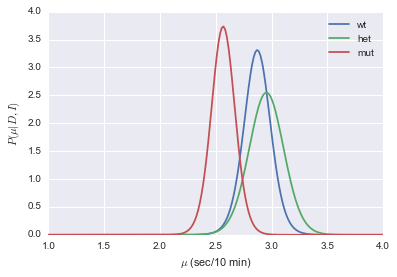

In [132]:
# Set up values of mu to consider in plot
mu = np.linspace(1.0, 4.0, 200)

# Compute posterior for each of the samples
post_wt = student_t(mu, wt)
post_het = student_t(mu, het)
post_mut = student_t(mu, mut)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel(r'$\mu$ (sec/10 min)')
plt.ylabel(r'$P(\mu|D,I)$')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Overall: Night and day

In [133]:
df_new = df_gt
inds = df_new['light'] == True

df_new =df_new.loc[inds, :]
df_new

,fish,genotype,day,light,CLOCK,zeit,activity,window
0,1,het,0,True,9.519,9.519,0.6,NaN
1,1,het,0,True,9.536,9.536,1.9,NaN
2,1,het,0,True,9.553,9.553,1.9,NaN
3,1,het,0,True,9.569,9.569,13.4,NaN
4,1,het,0,True,9.586,9.586,15.4,NaN
5,1,het,0,True,9.603,9.603,12.7,NaN
6,1,het,0,True,9.619,9.619,11.4,NaN
7,1,het,0,True,9.636,9.636,11.6,NaN
8,1,het,0,True,9.652,9.652,8.4,NaN
9,1,het,0,True,9.669,9.669,3.2,8.050000e+01


In [134]:
df_newNight = df_gt
inds = df_newNight['light'] == False

df_newNight =df_gt.loc[inds, :]
df_newNight

,fish,genotype,day,light,CLOCK,zeit,activity,window
269,1,het,0,False,14.003,14.003,4.8,8.100000e+00
270,1,het,0,False,14.019,14.019,2.4,1.050000e+01
271,1,het,0,False,14.036,14.036,1.3,1.180000e+01
272,1,het,0,False,14.053,14.053,0.9,1.270000e+01
273,1,het,0,False,14.069,14.069,0.0,1.270000e+01
274,1,het,0,False,14.086,14.086,0.0,1.270000e+01
275,1,het,0,False,14.103,14.103,0.0,1.270000e+01
276,1,het,0,False,14.119,14.119,0.0,1.270000e+01
277,1,het,0,False,14.136,14.136,0.0,1.270000e+01
278,1,het,0,False,14.153,14.153,0.0,9.400000e+00


In [135]:
fishIds = df_new.iloc[:, 0].tolist()
fishTypes = df_new.iloc[:,1].tolist()
fishActivity = df_new.iloc[:,6].tolist()

mutDay = []
wtDay = []
hetDay = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0

for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtDay.append(totalZeroesWt/totalPeriodsWt)
            totalZeroesWt = 0
            totalPeriodsWt = 0
        elif (fishTypes[i-1] == "mut"):
            mutDay.append(totalZeroesMut/totalPeriodsMut)
            totalZeroesMut = 0
            totalPeriodsMut = 0
        else:
            hetDay.append(totalZeroes/totalPeriods)
            totalZeroes = 0
            totalPeriods = 0
            
    if (fishActivity[i] >= 0.001):
        continue
    if (fishTypes[i] == "het" and fishActivity[i] < 0.001):
        totalZeroes += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriods += 1
    elif (fishTypes[i] == "wt" and fishActivity[i] < 0.001):
        totalZeroesWt += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >=  0.001):
            totalPeriodsWt += 1
    else:
        totalZeroesMut += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriodsMut += 1
totalRestLengthMut = 0.0
totalRestLengthWt = 0.0
totalRestLengthHet = 0.0
for i in range(len(mutDay)):
    totalRestLengthMut += mutDay[i]
for i in range(len(hetDay)):
    totalRestLengthHet += hetDay[i]
for i in range(len(wtDay)):
    totalRestLengthWt += wtDay[i]

mutDay = np.asarray(mutDay)
hetDay = np.asarray(hetDay)
wtDay = np.asarray(wtDay)

In [136]:
fishIds = df_newNight.iloc[:, 0].tolist()
fishTypes = df_newNight.iloc[:,1].tolist()
fishActivity = df_newNight.iloc[:,6].tolist()

mutNight = []
wtNight = []
hetNight = []
totalZeroes = 0
totalPeriods = 0
totalZeroesWt = 0
totalPeriodsWt = 0
totalZeroesMut = 0
totalPeriodsMut = 0

for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtNight.append(totalZeroesWt/totalPeriodsWt)
            totalZeroesWt = 0
            totalPeriodsWt = 0
        elif (fishTypes[i-1] == "mut"):
            mutNight.append(totalZeroesMut/totalPeriodsMut)
            totalZeroesMut = 0
            totalPeriodsMut = 0
        else:
            hetNight.append(totalZeroes/totalPeriods)
            totalZeroes = 0
            totalPeriods = 0
            
    if (fishActivity[i] >= 0.001):
        continue
    if (fishTypes[i] == "het" and fishActivity[i] < 0.001):
        totalZeroes += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriods += 1
    elif (fishTypes[i] == "wt" and fishActivity[i] < 0.001):
        totalZeroesWt += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >=  0.001):
            totalPeriodsWt += 1
    else:
        totalZeroesMut += 1
        if (i+1 < len(fishIds) and fishActivity[i+1] >= 0.001):
            totalPeriodsMut += 1
totalRestLengthMut = 0.0
totalRestLengthWt = 0.0
totalRestLengthHet = 0.0
for i in range(len(mutNight)):
    totalRestLengthMut += mutNight[i]
for i in range(len(hetNight)):
    totalRestLengthHet += hetNight[i]
for i in range(len(wtNight)):
    totalRestLengthWt += wtNight[i]

mutNight = np.asarray(mutNight)
hetNight = np.asarray(hetNight)
wtNight = np.asarray(wtNight)

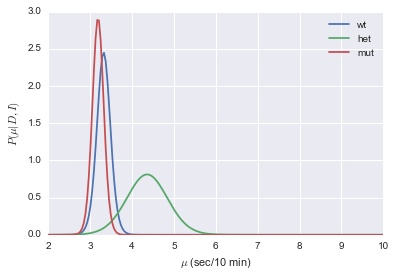

In [137]:
# Set up values of mu to consider in plot
mu = np.linspace(2.0, 10.0, 200)

# Compute posterior for each of the samples
post_wt = student_t(mu, wtDay)
post_het = student_t(mu, hetDay)
post_mut = student_t(mu, mutDay)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel(r'$\mu$ (sec/10 min)')
plt.ylabel(r'$P(\mu|D,I)$')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Day

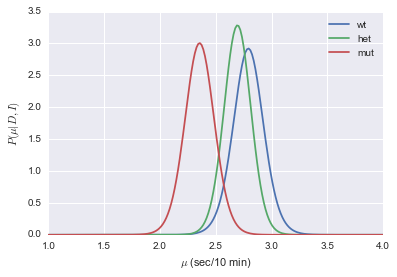

In [138]:
# Set up values of mu to consider in plot
mu = np.linspace(1.0, 4.0, 200)

# Compute posterior for each of the samples
post_wt = student_t(mu, wtNight)
post_het = student_t(mu, hetNight)
post_mut = student_t(mu, mutNight)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel(r'$\mu$ (sec/10 min)')
plt.ylabel(r'$P(\mu|D,I)$')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Night

In [139]:
fishIds = df_newNight.iloc[:, 0].tolist()
fishTypes = df_newNight.iloc[:,1].tolist()
fishActivity = df_newNight.iloc[:,6].tolist()

mutActivityNight = []
wtActivityNight = []
hetActivityNight = []
totalActivity = 0;
totalTimes = 0;

for i in range(len(fishIds)):
    if (i > 0 and fishIds[i] != fishIds[i-1]):
        if (fishTypes[i-1] == "wt"):
            wtActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
        elif (fishTypes[i-1] == "mut"):
            mutActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
        else:
            hetActivityNight.append(totalActivity/totalTimes)
            totalActivity = 0;
            totalTimes = 0;
    totalActivity += fishActivity[i]
    totalTimes += 1;  

totalMutActivity = 0
totalHetActivity = 0
totalWtActivity = 0
for i in range(len(mutActivityNight)):
    totalMutActivity += mut[i]
for i in range(len(hetActivityNight)):
    totalHetActivity += het[i]
for i in range(len(wtActivityNight)):
    totalWtActivity += wt[i]

mutActivityNight = np.asarray(mutActivityNight)
hetActivityNight = np.asarray(hetActivityNight)
wtActivityNight = np.asarray(wtActivityNight)


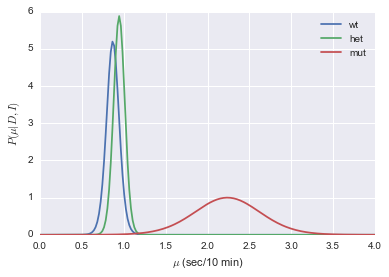

In [140]:
# Set up values of mu to consider in plot
mu = np.linspace(0.0, 4.0, 200)

# Compute posterior for each of the samples
post_wt = student_t(mu, wtActivityNight)
post_het = student_t(mu, hetActivityNight)
post_mut = student_t(mu, mutActivityNight)

# Plot the result
plt.plot(mu, post_wt)
plt.plot(mu, post_het)
plt.plot(mu, post_mut)
plt.xlabel(r'$\mu$ (sec/10 min)')
plt.ylabel(r'$P(\mu|D,I)$')
lg = plt.legend(('wt', 'het', 'mut'), loc='upper right')

Bingo: Parameter 2 (mean activity at night)